# Predicting Customer Churn. 

## Overview 

SyriaTel is a mobile network provider in Syria. This project aims to provide insights into the determinant factors of churning as well as predict future cases of churn using different models in order to provide adequate recommendations to the company. This would in turn help to retain customers / product consumers who would otherwise churn. This would help improve the health of the business while assisting in the forecasting of future revenue for the business. Building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, would then provide information on patterns that may exist and shed light on the problem.


## Business and Data Understanding 

#### Business Understanding 

The project uses [SyriaTel Customer Churn](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) dataset from kaggle. The dataset is going to be used to determine features that are likely very related to the possibility of users to stop or cancel using the services of SyriaTel comunications. In examining these features, it is possible to identify these features and use them to predict future churn possibilities.


In [1]:
# Import the necessary modules
# Modules dealing with data and visualizations
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels as statsmd

# Modules for modelling
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier


>> * **Loading and viewing the dataset**

In [2]:
# Loading the datset
df = pd.read_csv('churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

The dataset contains 3,333 rows and 21 columns. The columns contain features associated with call information such as number of minutes for calls, time of day the calls were made, the type of call, that is, international of to customer service etcetra. The target feature is the churn in the churn column which shows which consumers stopped using the services as well as which consumers continued using the service. The dataset is also imbalanced as will be seen later and this will need to be addressed as well

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Descriptive Statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.shape

(3333, 21)

> * From the above cells we can see that the dataset, there are no null values. This can be seen by the constant count in the description as well as non-null counts in the information about the dataset but this is confirmed in the next section. 
> * It also identifies 1 boolean column, 8 float and 8 integer columns and finally 4 object type columns. This means that there will be need to convert 5 columns for use including the target feature column. 

#### Data Preparation

> * In this section, the data is prepared before it is taken for modelling. This is where duplicated and missing values are checked for. From the information section, it is easy so see that there are no null values. Data type conversions will also be done here to prepare for modelling. This can be done through binary encoding, one hot encoding or dropping them if they are not useful.
> * This section also checks for multicollinearity as well as distribution of the dataset. For example normality of the distributions. There will be a need for resampling methods given the imbalance of the dataset.

##### EDA

* _This section explores the data and analyses the relationship between features in the dataset_

In [6]:
# Creating a function to view columns
def col_info(data):
    
    "This is a simple function to help describe the column data types"
    
    print('col_names: \n', data.columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('num_cols: \n', data.select_dtypes(int).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('cat_cols: \n', data.select_dtypes(object).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('boolean_cols: ', data.select_dtypes(bool).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('float_cols: \n', data.select_dtypes(float).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('The shape: ', data.shape)
    print('=====================================================================================')
    print('=====================================================================================')
    print(f"There are {len(data.select_dtypes(int).columns)} numeric type columns, {len(data.select_dtypes(object).columns)} object type columns\
    {len(data.select_dtypes(bool).columns)} boolean columns and {len(data.select_dtypes(float).columns)} float type columns out of {df.shape[1]}")
    

In [7]:
# Checking the columns according to datatypes
col_info(df) 

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total ni

In [8]:
# Chreating a function for checking missing and duplicated values
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    
    n_missing = data.isna().sum().sum()
    n_duplicated = data.duplicated().sum()
    return (f"There are '{n_missing}' missing values and '{n_duplicated}' duplicated values in the dataset")

In [9]:
# veiwing the number of missing and duplicated values
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

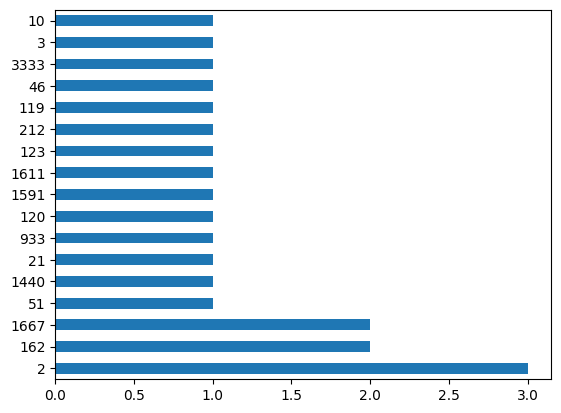

In [10]:
# Visualizing unique entries
df.nunique().value_counts().plot.barh();


In [11]:
# sns.pairplot(data=df)
# data_temp = df[["account length","total day calls","total eve calls","total night calls",
#                 "total intl calls","customer service calls","churn"]]
# data_temp1 = df.select_dtypes(int)
# sns.pairplot(data_temp1, hue="churn",height=2.5);
# plt.show();

In [12]:
# Get a distribution of the target variable
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64


      The distribution for churn is:
False    2850
True      483
Name: churn, dtype: int64
      


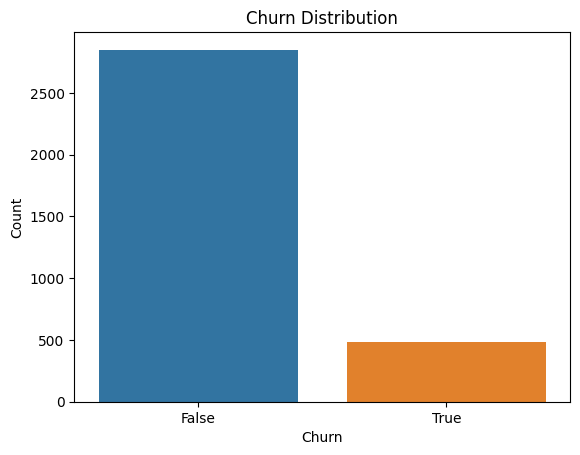

In [13]:

print(f"""
      The distribution for churn is:\n{df['churn'].value_counts()}
      """)

sns.countplot(data=df, x='churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

In [14]:
# numerical_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x='churn', y=col, data=df)
#     plt.xlabel('Churn')
#     plt.ylabel(col)
#     plt.title(f'Boxplot of {col} by Churn')
#     plt.show()

# "================================================================"

# numerical_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# fig, axes = plt.subplots(nrows=len(numerical_cols) // 4, ncols=4, figsize=(16, 16))
# for i, col in enumerate(numerical_cols):
#     row = i // 4
#     col = i % 4
#     sns.boxplot(x='churn', y=col, data=df, ax=axes[row, col])
#     axes[row, col].set_xlabel('Churn')
#     axes[row, col].set_ylabel(col)
#     axes[row, col].set_title(f'Boxplot of {col} by Churn')

# # Remove empty subplots
# if len(numerical_cols) % 4 != 0:
#     for j in range(len(numerical_cols) % 4, 4):
#         fig.delaxes(axes[-1, j])

# plt.tight_layout()
# plt.show()

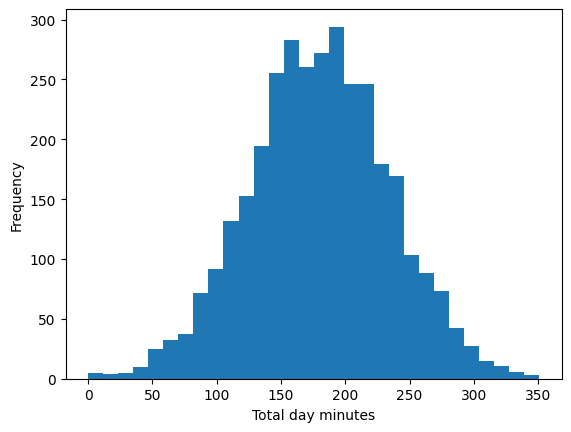

In [15]:
plt.hist(df['total day minutes'], bins=30)
plt.xlabel('Total day minutes')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_13197/2929036447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_corr = df.corr()['churn']


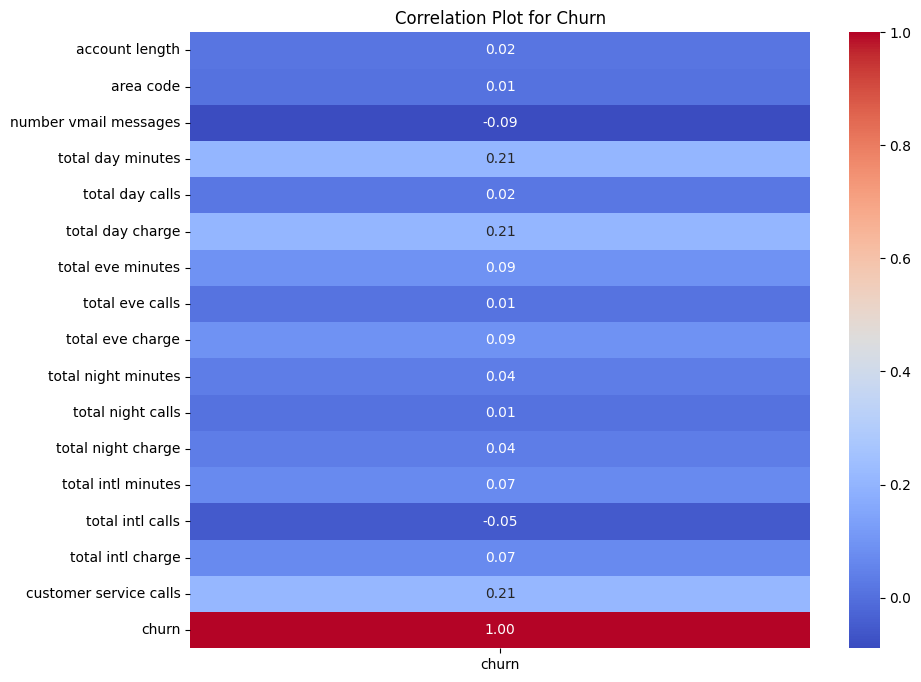

In [16]:
# Checking for correlation with the churn variable
churn_corr = df.corr()['churn']

# Visualizing
plt.figure(figsize=(10, 8))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Churn')
plt.show()

/tmp/ipykernel_13197/1289114725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


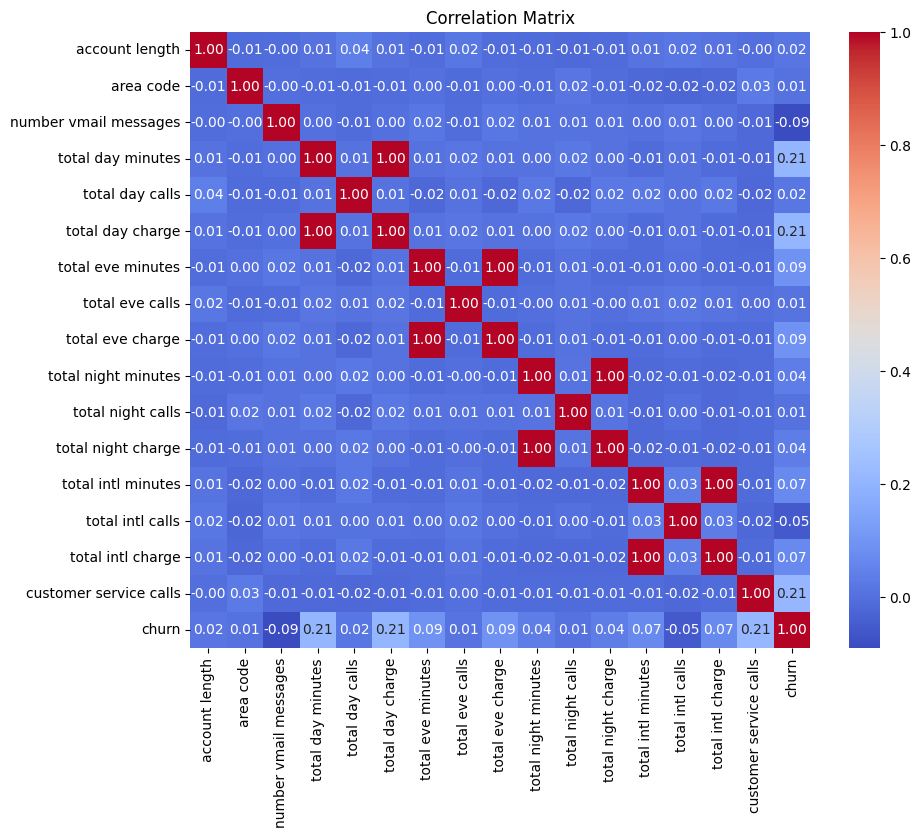

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

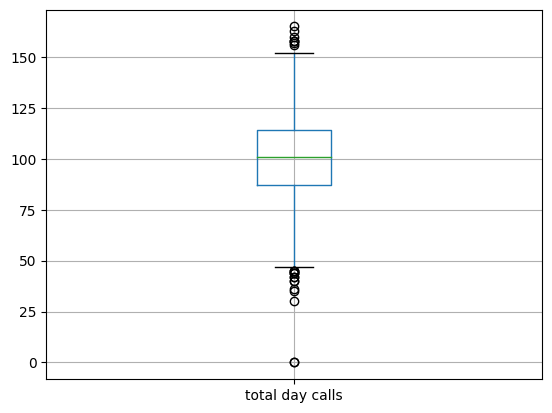

In [18]:
# Checking for Outliers
df.boxplot('total day calls')
plt.show()

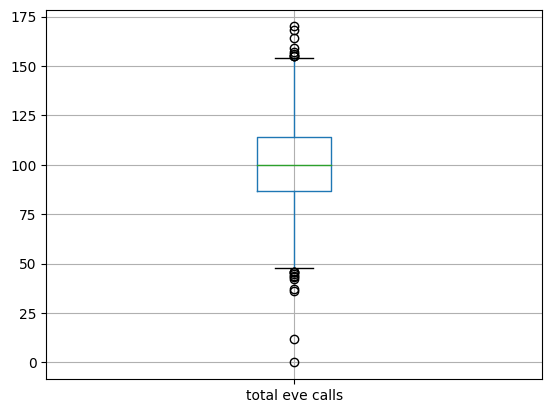

In [19]:
df.boxplot('total eve calls')
plt.show()

<AxesSubplot: >

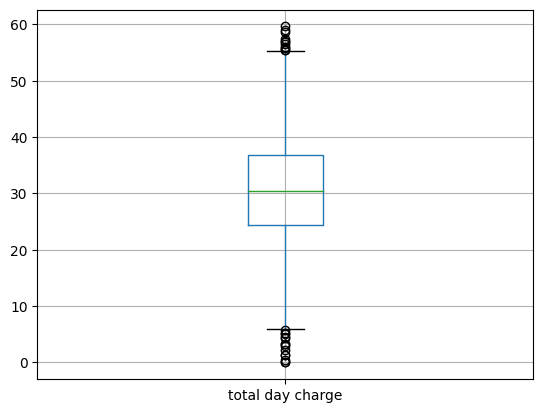

In [20]:
df.boxplot('total day charge')

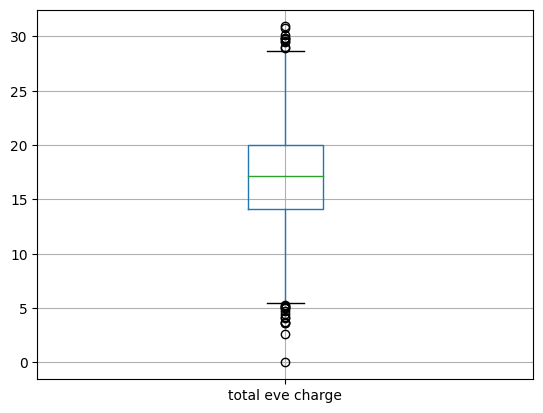

In [21]:
df.boxplot('total eve charge')
plt.show()

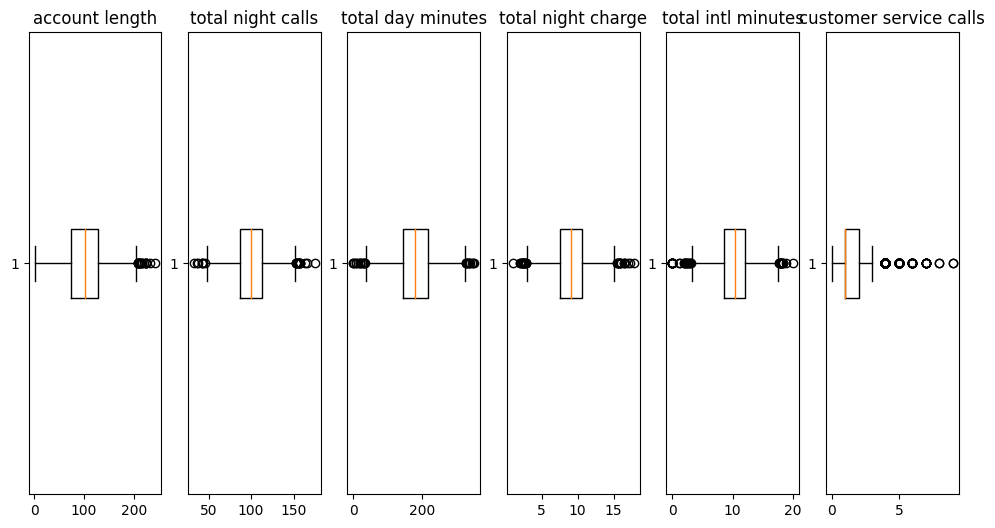

In [22]:
num_cols = ["account length", "total night calls", "total day minutes", "total night charge","total intl minutes", "customer service calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()


# df.boxplot(columns=[col for col in df.select_dtypes(include='int').columns])

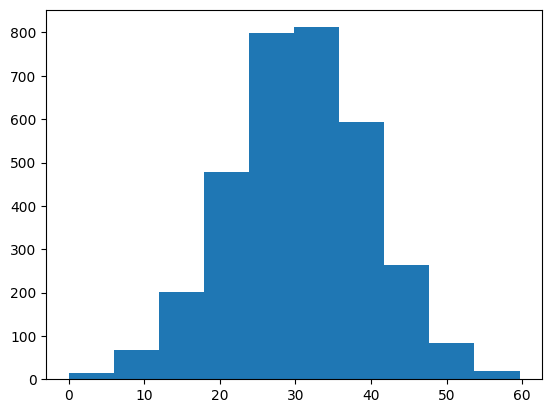

In [23]:
# Viewing relationships between Churn and other columns
plt.hist(df['total day charge'], bins=10)
# plt.xlabel('Column Name')
# plt.ylabel('Frequency')
# plt.title('Histogram of Column Name')
plt.show()

In [24]:
# plt.scatter(x=df['churn'], y=df['state'])
# plt.yticks(rotation=30)
# plt.show()

In [25]:
# fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
# for i, col in enumerate(num_cols):
#     data_churn = data[data["churn"] == 1][col]
#     data_no_churn = data[data["churn"] == 0][col]
#     axes[i].hist(data_churn, alpha=0.5, label="Churn", bins=20)
#     axes[i].hist(data_no_churn, alpha=0.5, label="No churn", bins=20)
#     axes[i].set_title(col)
#     axes[i].legend()

# plt.show()

<AxesSubplot: xlabel='international plan', ylabel='count'>

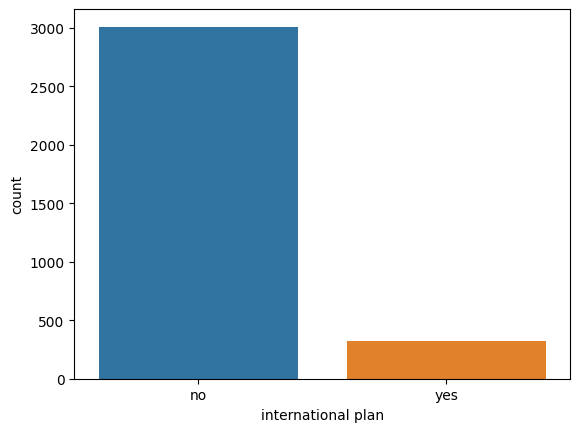

In [26]:
sns.countplot(data=df, x='international plan')

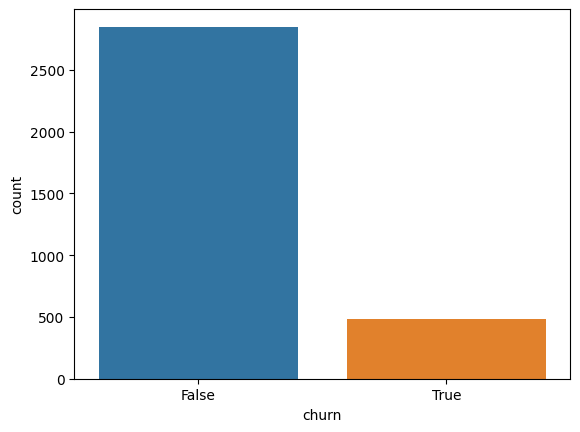

In [27]:
sns.countplot(data=df, x='churn');

From the visualizations above, we can see that there is imbalance in the dataset and we will thus need to standardize/regularize the dataset

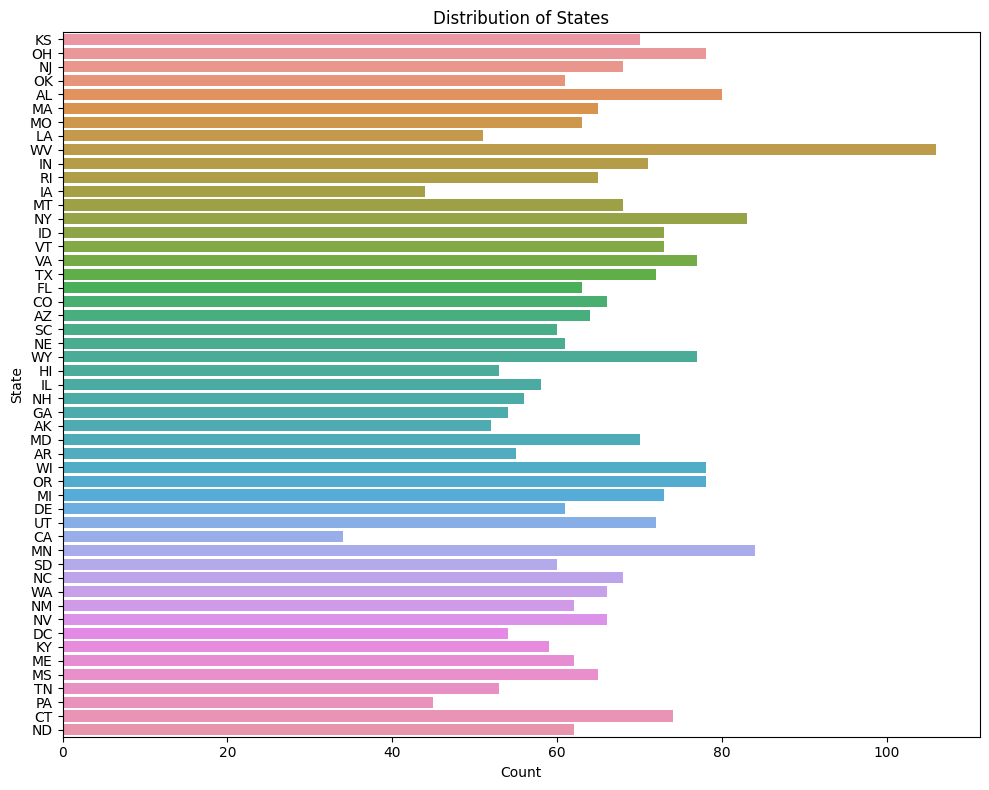

In [28]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, y='state')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of States')
plt.tight_layout()

plt.show()

In [29]:
# Dropping phonenumber column because it is not useful in analysis
dropped = df.drop('phone number', axis=1, inplace=True)

In [30]:
df['churn'] = df['churn'].replace({True: 1, False: 0}).astype(int)
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [31]:
print("Relationship between account length and churn:")
print(df.groupby("churn")["account length"].describe())

Relationship between account length and churn:
        count        mean       std  min   25%    50%    75%    max
churn                                                              
0      2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
1       483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0


In [32]:
# One-hot-encoding some categorical columns
# Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)

# Binary-encoding the other categorical columns
# Voicemail
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})


In [33]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,...,279.1,83,12.56,9.9,6,2.67,2,0,1,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,...,191.3,123,8.61,9.6,4,2.59,3,0,1,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,...,191.9,91,8.64,14.1,6,3.81,2,0,0,1
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,...,139.2,137,6.26,5.0,10,1.35,2,0,0,1


## Modeling

##### Baseline Model

In [34]:
X = df.drop(['churn', 'state'], axis=1)
y = df['churn']

# Perform a train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=132)

# # Split the dataset into training and testing sets
# X = data.drop(columns=["churn", "state", "area code"])
# y = data["churn"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Sunthetic Minority Oversampling Technique
sm = SMOTE()

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = sm.fit_resample(X_test, y_test)

In [36]:
print(pd.Series(y_train).value_counts())

print(pd.Series(y_train_resampled).value_counts())

print(pd.Series(y_test).value_counts())

print(pd.Series(y_test_resampled).value_counts())

0    2007
1     326
Name: churn, dtype: int64
0    2007
1    2007
Name: churn, dtype: int64
0    843
1    157
Name: churn, dtype: int64
1    843
0    843
Name: churn, dtype: int64


In [37]:
# y = np.ravel(target)

In [46]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

In [47]:
def modelling(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test_resampled
    
    base_cv = cross_val_score(model, X_train_scaled, y_train_resampled)
    
    fitting = model.fit(X1,y1)
    predicting = model.predict(X2)
    scoring = model.score(X2, y2)
    model_cv = cross_val_score(model, X1, y1)
    model_report = classification_report(y2, predicting)
    model_roc_auc = roc_auc_score(y2, predicting)
    
    print("Score:")
    print("\t",scoring)
    print("\nCross validation:")
    print("\t",model_cv)
    print("\nClass report:")
    print(model_report)
    print("\nROC_AUC:")
    print("\t",model_roc_auc)

In [48]:
base_model = LogisticRegression(random_state=132)

modelling(base_model)

Score:
	 0.7680901542111507

Cross validation:
	 [0.70361146 0.8132005  0.77833126 0.78455791 0.76932668]

Class report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       843
           1       0.76      0.78      0.77       843

    accuracy                           0.77      1686
   macro avg       0.77      0.77      0.77      1686
weighted avg       0.77      0.77      0.77      1686


ROC_AUC:
	 0.7680901542111507


In [ ]:
# # Logistic Regression
# base_model = LogisticRegression(random_state=132)

# base_model.fit(X_train_scaled, y_train_resampled)
# y_base_pred = base_model.predict(X_test_scaled)

In [49]:
# # Scoring 
# base_score = base_model.score(X_test_scaled, y_test)
# base_score

In [ ]:
# # Cross Validation
# base_cv = cross_val_score(base_model, X_train_scaled, y_train_resampled)
# base_cv

In [ ]:
# base_report = classification_report(y_test, y_base_pred)
# print(base_report)

In [ ]:
# # ROC Curve
# base_roc_auc = roc_auc_score(y_test, y_base_pred)
# base_roc_auc

In [50]:
def conf_matrix(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test_resampled
    
    predicting = model.predict(X2)
    
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X1, y1)
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y2, predicting)
    
    return dis_estimator, dis_predictor

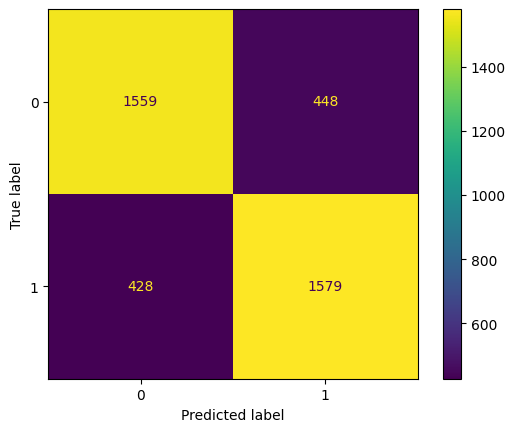

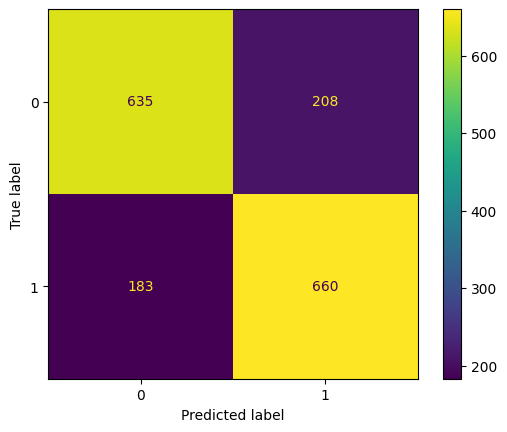

In [51]:
conf_matrix(base_model);

In [52]:
# # Displaying a confusion matrix
# ConfusionMatrixDisplay.from_estimator(base_model, X_train_scaled, y_train);

In [53]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_base_pred);

In [54]:
# # Make predictions on the training data
# y_train_pred = base_model.predict(X_train_scaled)

# # Compute the confusion matrix
# cm = confusion_matrix(y_train, y_train_pred)

# # Create ConfusionMatrixDisplay object
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)

# # Plot the confusion matrix
# cm_display.plot()

# # Add title and axis labels
# plt.title('Confusion Matrix - Training Data')

##### Decision Tree Classifier

In [55]:
# # Decision Tree
# tree = DecisionTreeClassifier(random_state=132, max_depth=5)

# tree.fit(X_train_scaled, y_train)
# y_tree_pred = tree.predict(X_test_scaled)

# # Scoring on trained data
# tree_train_score = tree.score(X_train_scaled, y_train)
# print('Trained data score: ', tree_train_score)

# # Scoring on test data
# tree_test_score = tree.score(X_test_scaled, y_test)
# print('Test data score: ', tree_test_score)

In [56]:
# # Cross Validation
# tree_cv = cross_val_score(tree, X_train_scaled, y_train)
# tree_cv

In [57]:
# # Report
# tree_report = classification_report(y_test, y_tree_pred)
# print(tree_report)

In [58]:
# tree_roc_auc = roc_auc_score(y_test, y_tree_pred)
# tree_roc_auc

In [59]:
tree = DecisionTreeClassifier(random_state=132, max_depth=5)

modelling(tree)

Score:
	 0.7669039145907474

Cross validation:
	 [0.78704857 0.79825654 0.79950187 0.80946451 0.80798005]

Class report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       843
           1       0.92      0.58      0.71       843

    accuracy                           0.77      1686
   macro avg       0.81      0.77      0.76      1686
weighted avg       0.81      0.77      0.76      1686


ROC_AUC:
	 0.7669039145907474


In [60]:
# # Train Confusion Matrix
# ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train);

In [61]:
# # Test Confusion Matrix
# ConfusionMatrixDisplay.from_predictions(y_test, y_tree_pred);

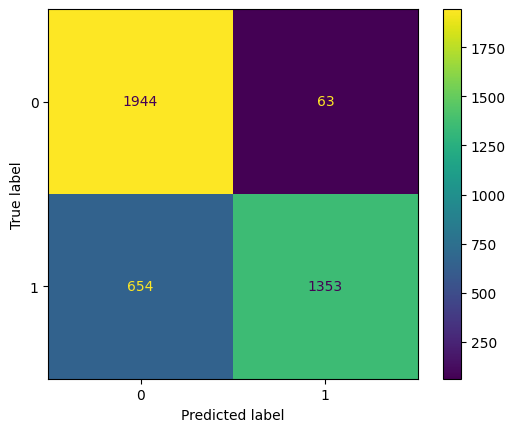

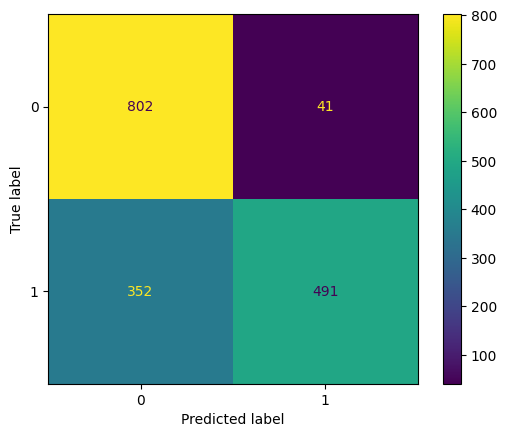

In [62]:
conf_matrix(tree);

##### KNN Model

In [63]:
# # KNN Model
# knn = KNeighborsClassifier(n_neighbors=4)

# knn.fit(X_train_scaled, y_train)
# knn_y_pred = knn.predict(X_test_scaled)
# knn_y_pred_proba = knn.predict_proba(X_test_scaled)

# knn_y_pred_proba

In [64]:
# # Scoring
# knn_score = knn.score(X_train_scaled, y_train)
# knn_score

In [65]:
# # Cross Validation
# knn_cv = cross_val_score(knn, X_train, y_train)
# knn_cv

In [66]:
# # Report 
# knn_report = classification_report(y_test, knn_y_pred)
# print(knn_report)

In [67]:
# knn_roc_auc = roc_auc_score(y_test, knn_y_pred)
# knn_roc_auc

In [68]:
knn = KNeighborsClassifier(n_neighbors=4)

modelling(knn)

Score:
	 0.7265717674970344

Cross validation:
	 [0.8505604  0.89912827 0.9128269  0.89041096 0.89650873]

Class report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       843
           1       0.81      0.59      0.68       843

    accuracy                           0.73      1686
   macro avg       0.75      0.73      0.72      1686
weighted avg       0.75      0.73      0.72      1686


ROC_AUC:
	 0.7265717674970343


In [69]:
# # With estimators
# ConfusionMatrixDisplay.from_estimator(knn, X_train_scaled, y_train);

In [70]:
# # With predictors
# ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred);

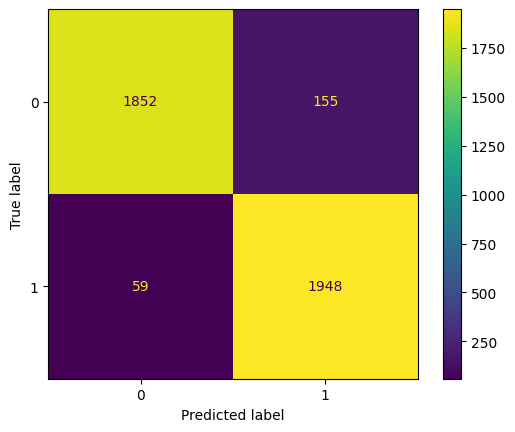

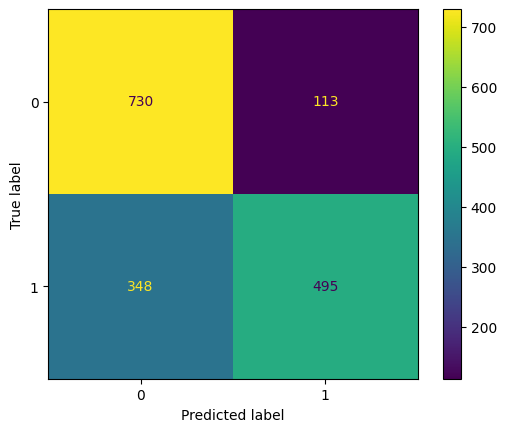

In [71]:
conf_matrix(knn);

##### Random Forest

In [72]:
# # Random Forest Classifier

# clf = RandomForestClassifier(n_estimators=4, random_state=132)

# clf.fit(X_train_scaled, y_train)
# #clf.fit(X_test, y_test)

# y_clf_pred = clf.predict(X_test_scaled)

In [73]:
# # Scoring
# clf_score = clf.score(X_train_scaled, y_train)
# clf_score

In [74]:
# # Cross validation
# clf_cv = cross_val_score(clf, X_train_scaled, y_train)
# clf_cv

In [75]:
# # Report
# clf_report = classification_report(y_test, y_clf_pred)
# print(clf_report)

In [76]:
# clf_roc = roc_curve(y_test, y_clf_pred)
# print(clf_roc)

In [77]:
# clf_roc_auc = roc_auc_score(y_test, y_clf_pred)
# clf_roc_auc

In [78]:
clf = RandomForestClassifier(n_estimators=4, random_state=132)

modelling(clf)

Score:
	 0.7787663107947805

Cross validation:
	 [0.85305106 0.91656289 0.89539228 0.90535492 0.89650873]

Class report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       843
           1       0.92      0.61      0.73       843

    accuracy                           0.78      1686
   macro avg       0.82      0.78      0.77      1686
weighted avg       0.82      0.78      0.77      1686


ROC_AUC:
	 0.7787663107947806


In [79]:
# # Confusion Matrix
# ConfusionMatrixDisplay.from_estimator(clf, X_train_scaled, y_train);

In [80]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_clf_pred);

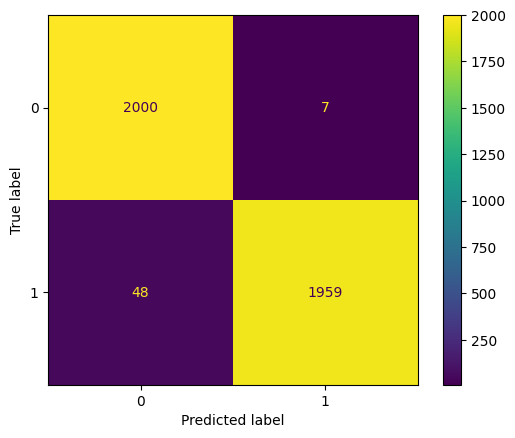

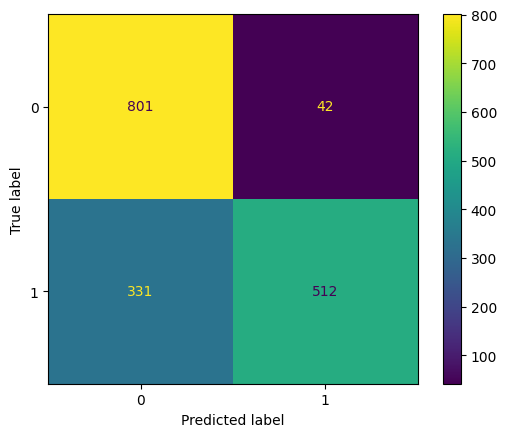

In [81]:
conf_matrix(clf);

In [82]:
# pipe = Pipeline([('mms', MinMaxScaler()),
#                  ('tree', DecisionTreeClassifier(random_state=123))])

# # Create the grid parameter
# grid = [{'tree__max_depth': [None, 2, 6, 10], 
#          'tree__min_samples_split': [5, 10]}]


# # Create the grid, with "pipe" as the estimator
# gridsearch = GridSearchCV(estimator=pipe, 
#                           param_grid=grid, 
#                           scoring='accuracy', 
#                           cv=5)

## Evaluation

## Conclusion

#### Recommendation